In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import os

pd.set_option('max.columns', None)
sns.set_style("whitegrid")

/Users/carloscliment/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
FIGURES_PATH = os.getcwd() + '/Figures/'
FIGURES_PATH

'/Users/carloscliment/Documents/GitHub/EDA_Strava/Figures/'

This data has been generated with the .py scripts in the repository. It consist on my own personal data on Strava. The aim of this analysis is to get some insights about my self and to study the impact of high effort activities on kudos. As any other social media, Strava has kudos --> likes. Qustions I will try to solve: 

* Which are my prefered activies?
* Which activity I spent more time on?
* Which activity type requires more effort?
* Evolution over time of my shape?
* Does the effort impacts likes?
* Does posting photos on the activity impacts likes?

In [3]:
df = pd.read_csv("strava_activities_selected_fields.csv").drop('Unnamed: 0', axis=1)
df.head()

,id,name,distance,moving_time,elapsed_time,total_elevation_gain,type,start_date_local,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,suffer_score
0,4301663060,Carrera a la hora del almuerzo,10005.3,3282,3406,50.0,Run,2020-11-07T12:21:19Z,España,6,8,0,1,0,3.049,6.4,84.6,True,160.6,175.0,65.9,46.4,2,0,112.0
1,4290831802,Carrera de tarde,8049.3,2694,2766,32.4,Run,2020-11-05T17:31:39Z,España,5,15,0,1,0,2.988,4.6,84.3,True,160.3,183.0,57.2,48.0,0,0,88.0
2,4286230449,Carrera de tarde,8006.6,2502,2692,30.7,Run,2020-11-04T17:44:54Z,España,2,9,0,1,0,3.200,4.0,84.1,True,147.2,178.0,57.2,48.0,2,0,45.0
3,4274546454,Natación de mañana,1100.0,1724,1746,0.0,Swim,2020-11-02T07:43:24Z,España,0,5,0,1,0,0.638,1.2,22.6,False,NaN,NaN,NaN,NaN,0,0,NaN
4,4270086678,Natación de mañana,550.0,710,2028,0.0,Swim,2020-11-01T10:25:54Z,España,0,0,0,1,0,0.775,6.0,23.8,False,NaN,NaN,NaN,NaN,0,0,NaN


In [4]:
df.tail()

,id,name,distance,moving_time,elapsed_time,total_elevation_gain,type,start_date_local,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,suffer_score
354,814702011,Carrera de tarde,5536.5,1747,2432,165.8,Run,2016-12-29T13:24:03Z,NaN,5,0,0,1,0,3.169,11.9,NaN,False,NaN,NaN,537.0,415.9,2,0,NaN
355,689339708,Ayunas,5652.3,1769,1769,0.0,Run,2016-08-26T09:00:31Z,NaN,3,0,0,1,0,3.195,4.3,NaN,False,NaN,NaN,14.1,3.8,0,0,NaN
356,679316688,Entrenamiento 3 ( velocidad ),5053.6,1409,1414,10.2,Run,2016-08-17T16:15:37Z,NaN,6,0,0,1,0,3.587,5.0,NaN,False,NaN,NaN,220.5,210.0,2,0,NaN
357,677222089,Entreno 2,13398.7,4415,4429,64.6,Run,2016-08-15T19:28:31Z,NaN,7,0,0,1,0,3.035,11.0,NaN,False,NaN,NaN,239.9,209.5,2,0,NaN
358,671305093,Entreno 1,10093.8,3268,3304,55.8,Run,2016-08-10T17:01:59Z,NaN,0,0,0,1,0,3.089,13.0,NaN,False,NaN,NaN,241.1,209.4,0,0,NaN


With this initial exploration we can see guess the units of the measures: 

* distance: meters
* moving_time: seconds
* elapsed_time: seconds
* total_elevation_gain: meters
* average_speed: meters/second (basically, distance/moving_time)
* max_speed: meters/second
* average_cadence: ?
* average_heartrate: ppm
* max_heartrate: ppm
* elev_high: meters
* elev_low: meters
* suffer_score: relative measure calculated by strava

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    359 non-null    int64  
 1   name                  359 non-null    object 
 2   distance              359 non-null    float64
 3   moving_time           359 non-null    int64  
 4   elapsed_time          359 non-null    int64  
 5   total_elevation_gain  359 non-null    float64
 6   type                  359 non-null    object 
 7   start_date_local      359 non-null    object 
 8   location_country      292 non-null    object 
 9   achievement_count     359 non-null    int64  
 10  kudos_count           359 non-null    int64  
 11  comment_count         359 non-null    int64  
 12  athlete_count         359 non-null    int64  
 13  photo_count           359 non-null    int64  
 14  average_speed         359 non-null    float64
 15  max_speed             3

It seems that the column ***start_date_local*** is considered as object. Let's modified it to timestamp: 

In [6]:
df['start_date_local']

0      2020-11-07T12:21:19Z
1      2020-11-05T17:31:39Z
2      2020-11-04T17:44:54Z
3      2020-11-02T07:43:24Z
4      2020-11-01T10:25:54Z
               ...         
354    2016-12-29T13:24:03Z
355    2016-08-26T09:00:31Z
356    2016-08-17T16:15:37Z
357    2016-08-15T19:28:31Z
358    2016-08-10T17:01:59Z
Name: start_date_local, Length: 359, dtype: object

In [7]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'], format='%Y-%m-%dT%H:%M:%SZ')
df['start_date_local']

0     2020-11-07 12:21:19
1     2020-11-05 17:31:39
2     2020-11-04 17:44:54
3     2020-11-02 07:43:24
4     2020-11-01 10:25:54
              ...        
354   2016-12-29 13:24:03
355   2016-08-26 09:00:31
356   2016-08-17 16:15:37
357   2016-08-15 19:28:31
358   2016-08-10 17:01:59
Name: start_date_local, Length: 359, dtype: datetime64[ns]

In [8]:
df.describe()

,id,distance,moving_time,elapsed_time,total_elevation_gain,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,suffer_score
count,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000,359.00000,359.000000,359.000000,359.0,359.000000,359.000000,188.000000,252.000000,252.000000,288.000000,288.000000,359.000000,359.000000,253.000000
mean,2.536178e+09,11687.279387,4226.813370,4634.247911,157.600279,2.863510,3.64624,0.259053,2.857939,0.0,2.903117,5.455989,79.845745,140.503571,166.880952,260.478472,160.419792,1.175487,0.128134,80.252964
std,7.457313e+08,12233.955148,7610.218603,7936.337982,235.271191,5.814716,2.93889,1.139573,19.116648,0.0,1.444620,3.901799,11.719965,26.075511,24.119592,338.522358,212.807219,3.048007,0.528796,85.161607
min,6.713051e+08,0.000000,441.000000,462.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.0,0.000000,0.000000,22.600000,77.000000,95.000000,1.600000,-2.000000,0.000000,0.000000,1.000000
25%,2.087646e+09,5074.400000,2168.000000,2346.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.0,2.838500,3.750000,82.000000,126.775000,156.000000,28.600000,4.000000,0.000000,0.000000,21.000000
50%,2.417409e+09,8972.500000,3023.000000,3137.000000,73.600000,0.000000,3.00000,0.000000,1.000000,0.0,3.174000,4.700000,83.000000,147.400000,173.000000,45.100000,18.350000,0.000000,0.000000,59.000000
75%,2.864874e+09,13005.750000,4102.000000,4477.000000,186.350000,3.000000,6.00000,0.000000,1.000000,0.0,3.410000,6.400000,84.025000,159.350000,183.000000,470.900000,394.600000,1.000000,0.000000,108.000000
max,4.301663e+09,92237.000000,105357.000000,105357.000000,1728.000000,37.000000,16.00000,12.000000,264.000000,0.0,6.770000,17.800000,88.800000,190.700000,223.000000,1480.200000,1181.600000,27.000000,5.000000,598.000000


In [9]:
#include time range
import datetime as dt
min_date = df['start_date_local'].min()
max_date = df['start_date_local'].max()
print(min_date, ",", max_date)

2016-08-10 17:01:59 , 2020-11-07 12:21:19


# Time spent on activities over time

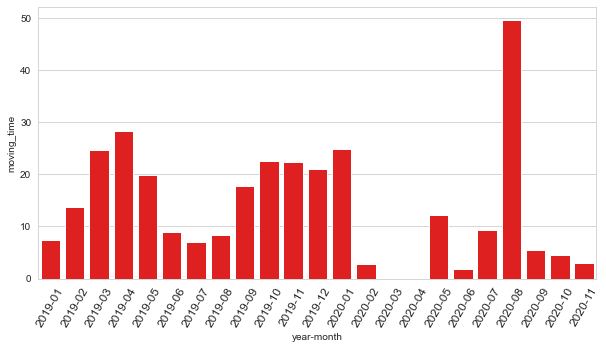

In [10]:
def group_by_date(df):
    df_by_date = df.set_index('start_date_local').groupby(pd.Grouper(freq="M")).sum()[['moving_time']]
    df_by_date['moving_time'] = df_by_date['moving_time'] / 3600
    df_by_date.reset_index(inplace=True)
    df_by_date['year-month'] = df_by_date['start_date_local'].apply(lambda x: str(x)[:7])
    df_by_date = df_by_date.sort_values('start_date_local', ascending=True)
    return df_by_date

def plot_activities_over_time(df_by_date):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(data=df_by_date, x='year-month', y='moving_time', color = 'red')
    plt.xticks(fontsize=12,rotation=60)
    fig.savefig(FIGURES_PATH + "activities_over_time.png")
    plt.show()

df_by_date = group_by_date(df)
# I only want to plot the last 2 years
plot_activities_over_time(df_by_date[df_by_date['start_date_local']>'2019-01-01'])


As far I remember, I didn't do so much excercise on August 2019, probably this is an outlier: 

In [11]:
df.set_index('start_date_local')['2020-09-01':'2020-08-01'].moving_time / 3600

start_date_local
2020-09-01 18:34:26     0.706667
2020-08-29 08:37:35     1.167500
2020-08-27 19:34:35     0.722500
2020-08-26 19:44:20     0.624167
2020-08-24 18:24:38     0.521389
2020-08-14 19:31:58    29.265833
2020-08-12 17:41:31    14.076111
2020-08-05 17:54:40     0.703333
2020-08-03 19:39:40     0.752222
2020-08-03 18:18:55     0.760833
2020-08-03 07:12:11     0.500556
2020-08-02 20:47:59     0.536111
Name: moving_time, dtype: float64

There are 2 activities of more than 10 hours, definitely these are errors. For that reason, I will filter the orignal dataframe removing activities that last more than 10 hours and plot the same figure: 

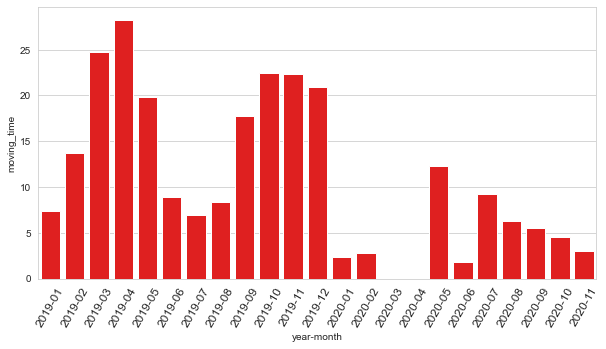

In [12]:
df = df[df['moving_time'] <= 36000]
df_by_date = group_by_date(df)
plot_activities_over_time(df_by_date[df_by_date['start_date_local']>'2019-01-01'])

This makes much more sense:
* From January 2019 to May 2019 there is an increasing number of activitiees as I was preparing the marathon I run on 19th of May (peak of training)
* In summer 2019 I kept doing some activities but with a lower level intensity
* From September 2019 to December I was preparing 2 races: one trail running and another one MTB
* From January 2020 I started working, then 2 months lockdown in Spain, and then I wanted to come back to activities, but actually I was not very motivated and I stopped

Let's see this differences. But first, I need to include trail running as an activity: 

In [13]:
print(df['type'].unique())

elev_lim = 350
df.loc[(df['type']=='Run') & (df['total_elevation_gain']>elev_lim)].head()

['Run' 'Swim' 'WeightTraining' 'Workout' 'Hike' 'Ride' 'Walk']


,id,name,distance,moving_time,elapsed_time,total_elevation_gain,type,start_date_local,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,suffer_score
94,2854379799,7a subida Penya Migjorn,21394.5,9114,10347,1092.1,Run,2019-11-10 09:01:00,España,7,11,0,5,0,2.347,5.6,79.5,True,170.4,201.0,1179.1,433.8,3,0,433.0
104,2817566871,Carrera de mañana,17427.5,7123,8654,788.6,Run,2019-10-26 09:14:05,España,2,8,0,2,0,2.447,4.9,81.8,True,156.5,184.0,1078.1,438.7,1,1,207.0
113,2781912594,Con el Trailieti de Migjorn,20694.4,9080,11018,1063.6,Run,2019-10-12 08:31:47,Dinamarca,3,12,0,4,0,2.279,4.1,79.5,True,158.1,188.0,1175.7,435.1,1,1,283.0
114,2778410821,Carrera de tarde,15007.2,5152,5453,559.0,Run,2019-10-10 17:56:24,Dinamarca,2,11,0,1,0,2.913,6.0,82.1,True,162.6,187.0,842.7,430.9,2,0,196.0
117,2768450698,Sudando Marmarela 🏃🏽‍♂️🏃🏽‍♂️😂,15296.3,5679,6319,528.7,Run,2019-10-06 18:02:57,Dinamarca,2,9,0,1,0,2.693,6.2,82.1,True,158.6,183.0,719.4,430.8,1,2,180.0


In [14]:
df.loc[(df['type']=='Run') & (df['total_elevation_gain']>elev_lim), "type"] = "Trail Run"
print(df["type"].unique())

['Run' 'Swim' 'WeightTraining' 'Workout' 'Hike' 'Ride' 'Trail Run' 'Walk']


In [ ]:
df_run = df[df['type']=='Run']
df_trail_run = df[df['type']=='Trail Run']
df_mtb = df[df['type']=='Ride']

df_by_date_run = group_by_date(df_run[df_run['start_date_local']>'2019-01-01'])
df_by_date_run['type'] = 'Run'
df_by_date_trail_run = group_by_date(df_trail_run[df_trail_run['start_date_local']>'2019-01-01'])
df_by_date_trail_run['type'] = 'Trail Run'
df_by_date_mtb = group_by_date(df_mtb[df_mtb['start_date_local']>'2019-01-01'])
df_by_date_mtb['type'] = 'MTB'

df_by_date = pd.concat([df_by_date_run.set_index('year-month'), 
                        df_by_date_trail_run.set_index('year-month'),
                        df_by_date_mtb.set_index('year-month')],
                      axis = 1)
df_by_date.columns = ['start_date_local', 'moving_time_running', 'type_run',
                     'start_date_local_tr', 'moving_time_tr', 'type_tr',
                     'start_date_local_mtb', 'moving_time_mtb','type_mtb']

df_by_date.drop(['start_date_local_tr', 'start_date_local_mtb'], axis = 1, inplace = True)
#fill missing values on moving times to 0
df_by_date['moving_time_tr'].fillna(0, inplace = True)
df_by_date['moving_time_mtb'].fillna(0, inplace = True)
df_by_date


In [ ]:
plt.figure(figsize=(10,6))

r_values = df_by_date['moving_time_running'].values
mtb_values = df_by_date['moving_time_tr'].values

graph_run = plt.bar(x=df_by_date.index,
                    height=df_by_date['moving_time_running'],
                    label = 'Run')

graph_trail_tun = plt.bar(x=df_by_date.index,
                          height=df_by_date['moving_time_tr'],
                          label = 'Trail Run',
                          bottom=r_values)
graph_mtb = plt.bar(x=df_by_date.index,
                          height=df_by_date['moving_time_mtb'],
                          label = 'MTB',
                          bottom=r_values + mtb_values)

plt.title("Hours per activity and month", fontsize=16)
plt.ylabel('Time (hours)', fontsize=14)
plt.xlabel('Year - Month', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=60)
plt.legend(fontsize=14)
plt.savefig(FIGURES_PATH + "activities_over_time_by_activity.png")
plt.show()

# Which is my prefered type of activity? 

However, I would like to include one category more. I think running and trail running are very different on terms of effort, duration... For that reason, I will create this new category. I will consider as trail running  every running activty that has an elevation gain higher than 200m. First I print the results as a sanity check

Let's see what is the activity I have more registers

In [ ]:
agg = df['type'].value_counts().sort_values(ascending = False)
agg

In [ ]:
#I will plot the same kind of results in more occasions
def plot_value_counts(agg, title, ylabel, color_=None, name='image.png'):
    plt.figure(figsize=(12,5))
    sns.barplot(x=agg.index, y=agg.values, color=color_)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.savefig(FIGURES_PATH + name)
    plt.show()

plot_value_counts(agg, title='Number of registers by activity', ylabel='Number of registers', name='registers_by_activity.png')

Without any doubt, running is my prefered activity

# Which activity I spend more time on? 

Let's see now which is the activity I spend more time

In [ ]:
agg = pd.pivot_table(data = df, index='type',
                     aggfunc='sum', values='moving_time').sort_values('moving_time', ascending = False)
agg['moving_time'] = agg['moving_time']/3600

In [ ]:
plot_value_counts(agg.iloc[:,0], title='Hours spent by activity', ylabel='Time (hours)', name='time_by_activity.png')

The difference between Run and Ride is closer now, makes sense as usually bike activities are longer than running ones: 

In [ ]:
df.loc[(df["type"]=='Run') | (df['type']=='Ride'), ["type", 'moving_time']].groupby('type').median()

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df.loc[df["type"]=='Run', 'moving_time'], color='b', bins=50, label='Run')
plt.hist(df.loc[df["type"]=='Ride', 'moving_time'], color='g', bins=50, label='Ride')
plt.legend()
plt.title('Histograms of moving time by activity')
plt.savefig(FIGURES_PATH + 'histogram_run_ride.png')
plt.show()

With this preliminar analysis I am able to demonstrate that running is the activity I have spent more time on, however, the difference is not as big as the number of activities, since Ride activities are longer

# Which activity requires a bigger effort?

Strava already has a way of measuring the effort, however, I will use the heart rate as a error measure

## Average Heart Rate

In [ ]:
agg = pd.pivot_table(df, values = 'average_heartrate',
                      index = 'type', aggfunc='median').sort_values('average_heartrate', ascending = False)
agg

It can seem a bit controversial the term: "Median Average Heart Rate". Strava provides two metrics regarding the heart rate: Average and Max. In this section I am calculating the Median of the Aveage heart rates by type of activity

In [ ]:
plot_value_counts(agg.iloc[:,0], title='Median Avearage Heart Rate by Activity',
                  ylabel='Average Heart Rate', color_='r',
                  name='median_average_heartrate.png')

Is the first time that 'Run' is not the **star** of the analysis, apparently Trail Run is a harder sport. I wouldn't expect that, as trail run is general, a longer activity, and it is common to walk when the slop is high... Interesting!

In order to indtroduce something new in the analysis, I will also create a box-plot on the 

In [ ]:
def plot_box_plot(df, cat_var, num_var, title, name):
    data = df.copy()
    plt.figure(figsize=(10,8))
    sns.boxplot(x=data[cat_var], y=data[num_var])
    plt.title(title)
    plt.savefig(FIGURES_PATH + name)
    plt.show()

plot_box_plot(df, 'type', 'average_heartrate', 'Boxplot of average heartrate', name='median_average_heartrate_boxplot.png')

Results make sense, we can identify two groups:

+ **Hard activities**: Run, Ride, Trail Run
+ **Easy activities**: WeithTraining, Workout, Hike

## Max Heart Rate

In [ ]:
agg = pd.pivot_table(df, values = 'max_heartrate',
                      index = 'type', aggfunc='median').sort_values('max_heartrate', ascending = False)
agg

In [ ]:
plot_value_counts(agg.iloc[:,0], title='Median Max Heart Rate by Activity',
                  ylabel='Max Heart Rate', color_='r',
                  name='median_max_heartrate.png')

In [ ]:
plot_box_plot(df, 'type', 'max_heartrate', 'Distribution of heartrate', 'median_max_heartrate.png')

In this case, the difference it is not as clear as with the average heartrate. However, if we look at the bar graph in the boxplot, we can still differenciate those two groups. There can be seen easy that there exist two different levels for the median max heart rate

# Next steps

Next steps will be to create a Regression Model to predict moving time. Actually, what I want to predict it is not the moving time, is what will be the finishing time for a given running race. For that, the input parameters should be: 

* Distance
* Elevation
* Current shape of the athlete (my self now, but maybe, in the future, I can generalize the model...)

Current shape of the athlete is the most tricky part, we will think how to compute that later
